In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
# Read in file
df = pd.read_csv("ABMatchData.csv")

# Separate year and add as new column
yr = df["Date"].str.split("-", 1)
year = [y[0] for y in yr]
df["Year"] = year

# Rearrange and drop columns
df = df[['Opposition Name', 'Date', 'Year', 'Point Gap', 'Result', 'Location',
       'Opposition Debutants', 'Debutants', 'Opposition Rating', 'Rating']]
df.head()

,Opposition Name,Date,Year,Point Gap,Result,Location,Opposition Debutants,Debutants,Opposition Rating,Rating
0,Canada,2003-10-17,2003,62,Win,Melbourne,0,1,65.62,89.80
1,Tonga,2003-10-24,2003,84,Win,Brisbane,1,1,70.08,89.80
2,Wales,2003-11-02,2003,16,Win,Sydney,0,0,76.92,89.80
3,South Africa,2003-11-08,2003,20,Win,Melbourne,0,0,81.84,89.80
4,Australia,2003-11-15,2003,-12,Loss,Sydney,0,0,86.20,90.41


In [4]:
df.corr(method="pearson")

,Point Gap,Opposition Debutants,Debutants,Opposition Rating,Rating
Point Gap,1.000000,0.155380,0.216510,-0.602989,-0.030852
Opposition Debutants,0.155380,1.000000,0.228839,-0.004841,0.044934
Debutants,0.216510,0.228839,1.000000,-0.279492,-0.085494
Opposition Rating,-0.602989,-0.004841,-0.279492,1.000000,-0.004186
Rating,-0.030852,0.044934,-0.085494,-0.004186,1.000000


## Total Match Results

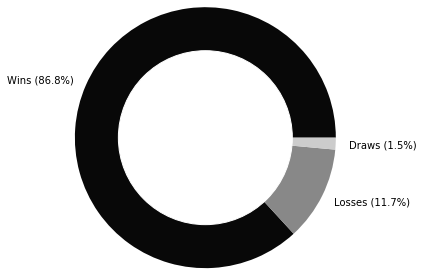

In [3]:
# Total wins, losses, draws
size = df["Result"].value_counts()

# Pie chart settings
labels = ["Wins (86.8%)", "Losses (11.7%)", "Draws (1.5%)"]
colors = ["#080808","#888888","#CCCCCC"]
my_circle=plt.Circle((0,0),1, color="#FFFFFF")

# Plot pie chart
plt.pie(size, labels=labels, colors=colors, radius=1.5)
p=plt.gcf()
p.gca().add_artist(my_circle)
# plt.title("Match Results Between 2003 and 2018", loc="center", pad=40)
plt.savefig('../Images/total-match-results-pie.png')
plt.show()

## Match Results Over Time (Stacked Bar)

In [4]:
# Store count of results by year in data frame
grouped_data = df.groupby(["Year", "Result"], as_index=False).size()
df2 = grouped_data.reset_index().rename(columns = {0:"count"})
df2 = df2.pivot(index = "Year",columns = "Result",values = "count")
df2 = df2.fillna(0)
df2 = df2.reset_index()
df2.head()

Result,Year,Draw,Loss,Win
0,2003,0.0,1.0,5.0
1,2004,0.0,2.0,9.0
2,2005,0.0,1.0,11.0
3,2006,0.0,1.0,12.0
4,2007,0.0,2.0,10.0


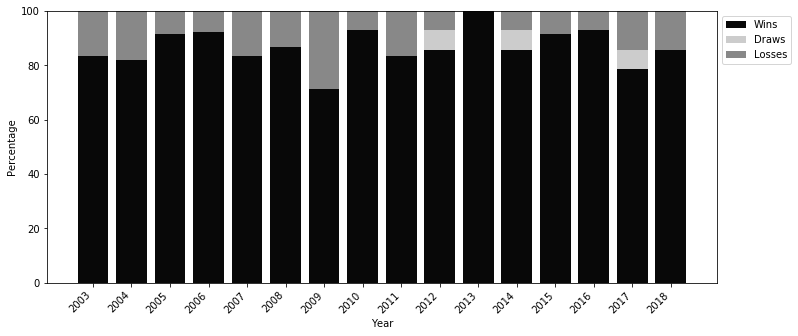

In [5]:
f, ax = plt.subplots(1, figsize=(12,5))

# Positions of the left bar boundaries
bar_l = [i for i in range(len(df2['Win']))] 

# Positions of the x-axis ticks
tick_pos = [i for i in bar_l] 

# Total score
totals = [i+j+k for i,j,k in zip(df2['Win'], df2['Draw'], df2['Loss'])]

# Percentage of wins, draws, losses
win_pct = [i / j * 100 for  i,j in zip(df2['Win'], totals)]
draw_pct = [i / j * 100 for  i,j in zip(df2['Draw'], totals)]
loss_pct = [i / j * 100 for  i,j in zip(df2['Loss'], totals)]

# Create bars for chart
ax.bar(bar_l, win_pct, label='Win', color="#080808")
ax.bar(bar_l, draw_pct, bottom=win_pct, label='Draw', color="#CCCCCC")
ax.bar(bar_l, loss_pct, bottom=[i+j for i,j in zip(win_pct, draw_pct)], label='Losses', color="#888888")

# Set ticks and labels
plt.xticks(tick_pos, df2['Year'])
ax.set_ylabel("Percentage")
ax.set_xlabel("Year")

# Rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.title("Percentage of Match Results Over Time")
plt.legend(["Wins", "Draws", "Losses"],bbox_to_anchor=(1,1))
plt.savefig("../Images/results-over-time-stacked.png")
plt.show()

## Match Results by Opposition Teams

In [12]:
# Group data by opposition teams and results
grouped_data = df.groupby(["Opposition Name", "Result"], as_index=False).size()
df3 = grouped_data.reset_index().rename(columns = {0:"Count"})
df3 = df3.pivot(index="Opposition Name",columns="Result",values="Count")
df3 = df3.fillna(0)
df3 = df3.reset_index()
df3.head()

Result,Opposition Name,Draw,Loss,Win
0,Argentina,0.0,0.0,17.0
1,Australia,2.0,8.0,36.0
2,Canada,0.0,0.0,3.0
3,England,0.0,1.0,15.0
4,Fiji,0.0,0.0,2.0


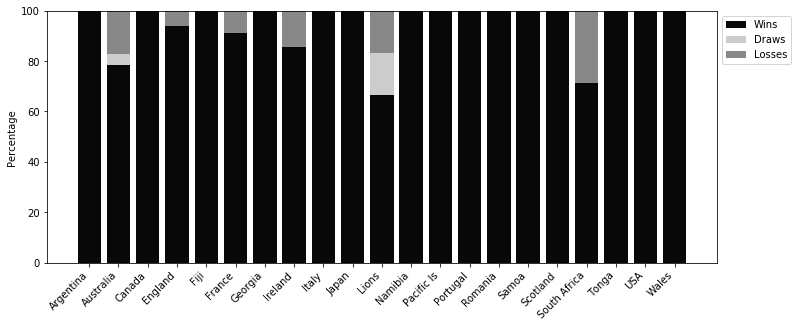

In [31]:
f, ax = plt.subplots(1, figsize=(12,5))

# Positions of the left bar boundaries
bar_l = [i for i in range(len(df3['Win']))] 

# Positions of the x-axis ticks
tick_pos = [i for i in bar_l] 

# Total score
totals = [i+j+k for i,j,k in zip(df3['Win'], df3['Draw'], df3['Loss'])]

# Percentage of wins, draws, losses
win_pct = [i / j * 100 for  i,j in zip(df3['Win'], totals)]
draw_pct = [i / j * 100 for  i,j in zip(df3['Draw'], totals)]
loss_pct = [i / j * 100 for  i,j in zip(df3['Loss'], totals)]

# Create bars for chart
ax.bar(bar_l, win_pct, label='Win', color='#080808')
ax.bar(bar_l, draw_pct, bottom=win_pct, label='Draw', color="#CCCCCC")
ax.bar(bar_l, loss_pct, bottom=[i+j for i,j in zip(win_pct, draw_pct)], label='Losses', color="#888888")

# Set ticks and labels
plt.xticks(tick_pos, df3['Opposition Name'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(["Wins", "Draws", "Losses"],bbox_to_anchor=(1,1))
# plt.title("Percentage of Match Results per Opposition Team")
plt.subplots_adjust(bottom=.2, top=.9)
plt.savefig("../Images/results-by-opposition-team.png")
plt.show()

## Average Point Gap by Year vs. Average Rating

In [4]:
# Group data by year and take averages
grouped_data = df.groupby(["Year"], as_index=False).mean()
df4 = grouped_data[["Year", "Point Gap", "Rating", "Opposition Rating"]]
df4.head()

,Year,Point Gap,Rating,Opposition Rating
0,2003,32.833333,89.630000,77.553333
1,2004,17.000000,91.125455,82.130000
2,2005,23.500000,91.545833,82.215000
3,2006,15.846154,93.612308,83.667692
4,2007,37.166667,93.900000,78.958333


In [15]:
df4.corr(method="pearson")

,Point Gap,Rating,Opposition Rating
Point Gap,1.000000,0.070215,-0.778665
Rating,0.070215,1.000000,0.144949
Opposition Rating,-0.778665,0.144949,1.000000


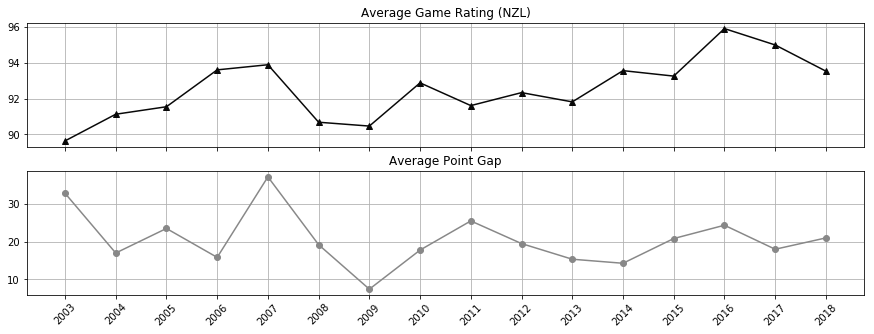

In [10]:
# Set variable values
x = df4["Year"]
pt_gap = df4["Point Gap"]
nzl_rating = df4["Rating"]

# Plot 2 subplots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,5))

ax1.plot(x, nzl_rating, color="#080808", marker="^")
ax1.set_title('Average Game Rating (NZL)')

ax2.plot(x, pt_gap, color="#888888", marker="o")
ax2.set_title('Average Point Gap')

plt.xticks(rotation=45)
ax1.grid()
ax2.grid()
plt.savefig("../Images/avg-pt-gap-rating1.png")
plt.show()

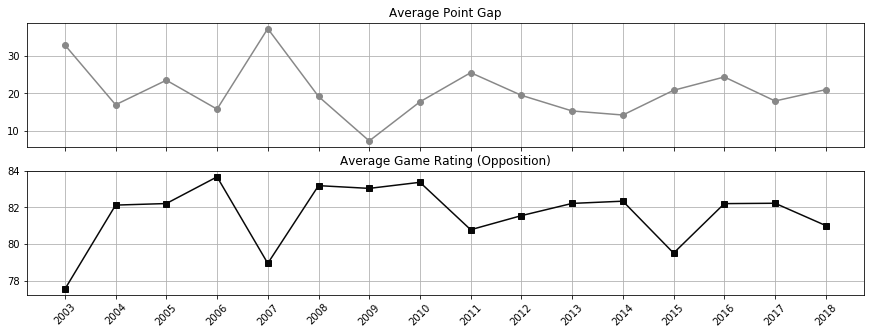

In [13]:
# Set variable values
opp_rating = df4["Opposition Rating"]

# Plot 2 subplots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,5))

ax1.plot(x, pt_gap, color="#888888", marker="o")
ax1.set_title('Average Point Gap')

ax2.plot(x, opp_rating, color="#080808", marker="s")
ax2.set_title('Average Game Rating (Opposition)')

plt.xticks(rotation=45)
ax1.grid()
ax2.grid()
plt.savefig("../Images/avg-pt-gap-rating2.png")
plt.show()

## Point Gap vs. Opposition team

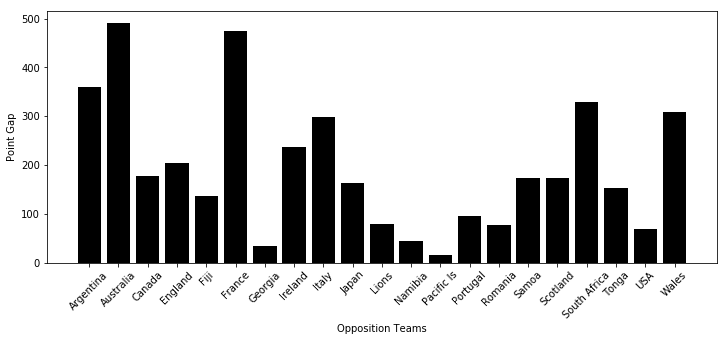

In [32]:
# Group data by opposition team and take sums
grouped_data = df.groupby(["Opposition Name"], as_index=False)
pts = grouped_data["Point Gap"].sum()
x = pts["Opposition Name"]
y = pts["Point Gap"]

# Plot data
plt.figure(figsize=(12,5))
plt.bar(x, y, color="k")
plt.xticks(rotation=45)
# plt.title("Total Point Gap per Opposition Team")
plt.xlabel("Opposition Teams")
plt.ylabel("Point Gap")
plt.subplots_adjust(bottom=.2, top=.9)
plt.savefig("../Images/total-point-gap-per-team.png")
plt.show()

## Point Gap per Team Lost

### Australia

In [4]:
df_aus = df[["Opposition Name", "Date", "Point Gap", "Result"]]
df_aus = df_aus.loc[df["Opposition Name"] == "Australia"].reset_index()
df_aus = df_aus.drop(columns="index")
df_aus.head()

,Opposition Name,Date,Point Gap,Result
0,Australia,2003-11-15,-12,Loss
1,Australia,2004-07-17,9,Win
2,Australia,2004-08-07,-5,Loss
3,Australia,2005-08-13,17,Win
4,Australia,2005-09-03,10,Win


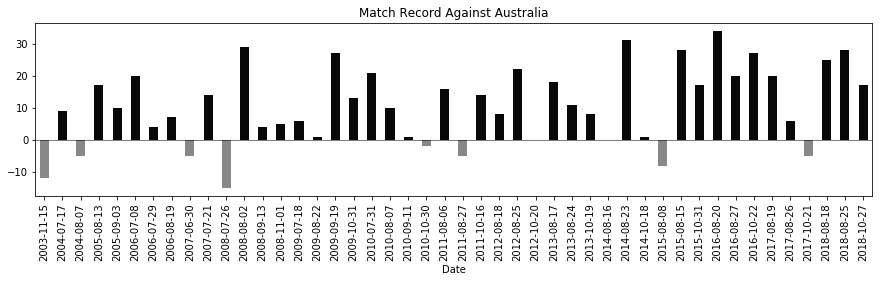

In [38]:
df_aus.plot.bar(x='Date', color=[np.where(df_aus["Point Gap"]>0, "#080808", "#888888")], figsize=(15,4),
           title="Match Record Against Australia", legend=False)
plt.axhline(color='k', lw=0.5)
plt.subplots_adjust(bottom=.3, top=.9)
plt.savefig("../Images/pt-gap-aus.png")
plt.show()

### England

In [40]:
df_eng = df[["Opposition Name", "Date", "Point Gap", "Result"]]
df_eng = df_eng.loc[df["Opposition Name"] == "England"].reset_index()
df_eng = df_eng.drop(columns="index")
df_eng.head()

,Opposition Name,Date,Point Gap,Result
0,England,2004-06-12,33,Win
1,England,2004-06-19,24,Win
2,England,2005-11-19,4,Win
3,England,2006-11-05,21,Win
4,England,2008-06-14,17,Win


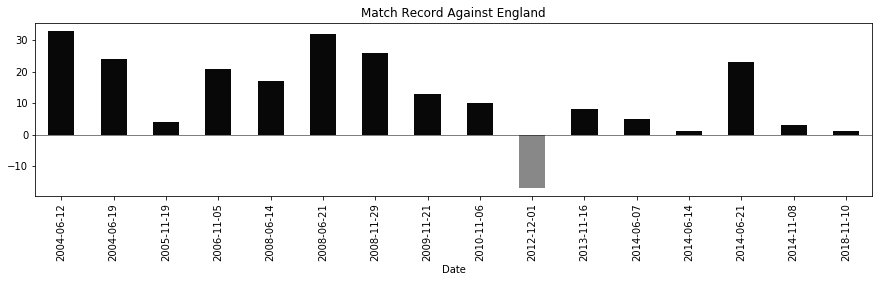

In [41]:
df_eng.plot.bar(x='Date', color=[np.where(df_eng["Point Gap"]>0, "#080808", "#888888")], figsize=(15,4),
           title="Match Record Against England", legend=False)
plt.axhline(color='k', lw=0.5)
plt.subplots_adjust(bottom=.3, top=.9)
plt.savefig("../Images/pt-gap-eng.png")
plt.show()

### France

In [42]:
df_fra = df[["Opposition Name", "Date", "Point Gap", "Result"]]
df_fra = df_fra.loc[df["Opposition Name"] == "France"].reset_index()
df_fra = df_fra.drop(columns="index")
df_fra.head()

,Opposition Name,Date,Point Gap,Result
0,France,2003-11-20,27,Win
1,France,2004-11-27,39,Win
2,France,2006-11-11,44,Win
3,France,2006-11-18,12,Win
4,France,2007-06-02,31,Win


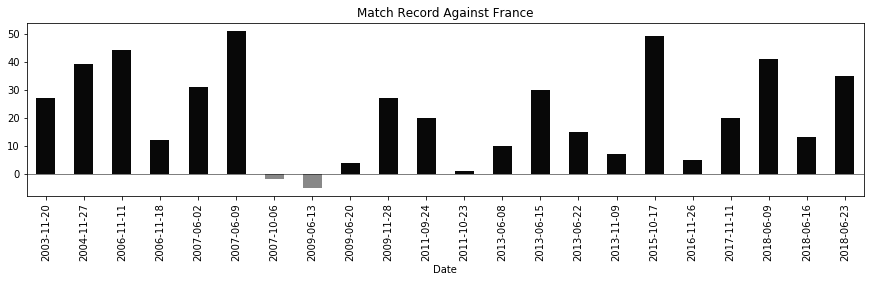

In [43]:
df_fra.plot.bar(x='Date', color=[np.where(df_fra["Point Gap"]>0, "#080808", "#888888")], figsize=(15,4),
           title="Match Record Against France", legend=False)
plt.axhline(color='k', lw=0.5)
plt.subplots_adjust(bottom=.3, top=.9)
plt.savefig("../Images/pt-gap-fra.png")
plt.show()

### Ireland

In [44]:
df_ire = df[["Opposition Name", "Date", "Point Gap", "Result"]]
df_ire = df_ire.loc[df["Opposition Name"] == "Ireland"].reset_index()
df_ire = df_ire.drop(columns="index")
df_ire.head()

,Opposition Name,Date,Point Gap,Result
0,Ireland,2005-11-12,38,Win
1,Ireland,2006-06-10,11,Win
2,Ireland,2006-06-17,10,Win
3,Ireland,2008-06-07,10,Win
4,Ireland,2008-11-15,19,Win


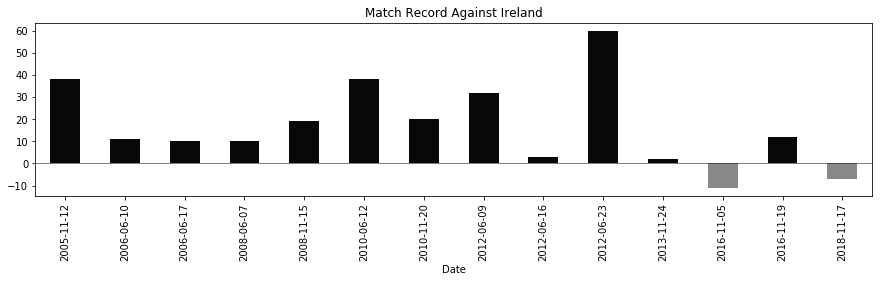

In [45]:
df_ire.plot.bar(x='Date', color=[np.where(df_ire["Point Gap"]>0, "#080808", "#888888")], figsize=(15,4),
           title="Match Record Against Ireland", legend=False)
plt.axhline(color='k', lw=0.5)
plt.subplots_adjust(bottom=.3, top=.9)
plt.savefig("../Images/pt-gap-ire.png")
plt.show()

### British & Irish Lions

In [46]:
df_bil = df[["Opposition Name", "Date", "Point Gap", "Result"]]
df_bil = df_bil.loc[df["Opposition Name"] == "Lions"].reset_index()
df_bil = df_bil.drop(columns="index")
df_bil.head()

,Opposition Name,Date,Point Gap,Result
0,Lions,2005-06-25,18,Win
1,Lions,2005-07-02,30,Win
2,Lions,2005-07-09,19,Win
3,Lions,2017-06-24,15,Win
4,Lions,2017-07-01,-3,Loss


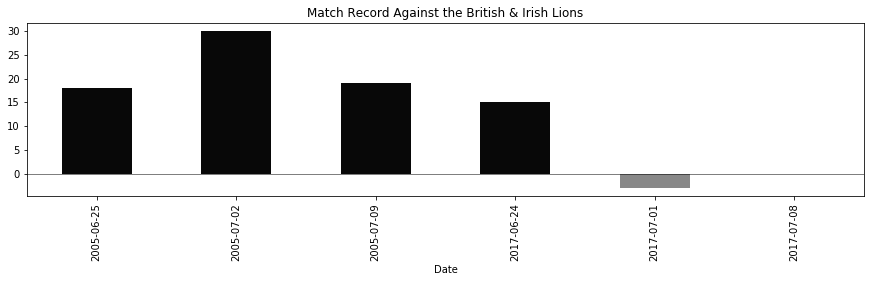

In [47]:
df_bil.plot.bar(x='Date', color=[np.where(df_bil["Point Gap"]>0, "#080808", "#888888")], figsize=(15,4),
           title="Match Record Against the British & Irish Lions", legend=False)
plt.axhline(color='k', lw=0.5)
plt.subplots_adjust(bottom=.3, top=.9)
plt.savefig("../Images/pt-gap-bil.png")
plt.show()

### South Africa

In [48]:
df_rsa = df[["Opposition Name", "Date", "Point Gap", "Result"]]
df_rsa = df_rsa.loc[df["Opposition Name"] == "South Africa"].reset_index()
df_rsa = df_rsa.drop(columns="index")
df_rsa.head()

,Opposition Name,Date,Point Gap,Result
0,South Africa,2003-11-08,20,Win
1,South Africa,2004-07-24,2,Win
2,South Africa,2004-08-14,-14,Loss
3,South Africa,2005-08-06,-6,Loss
4,South Africa,2005-08-27,4,Win


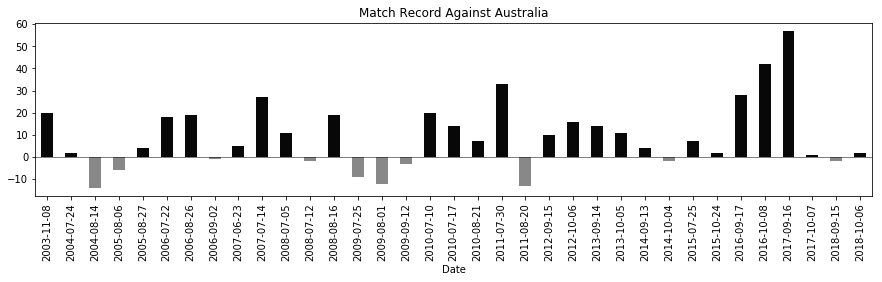

In [49]:
df_rsa.plot.bar(x='Date', color=[np.where(df_rsa["Point Gap"]>0, "#080808", "#888888")], figsize=(15,4),
           title="Match Record Against Australia", legend=False)
plt.axhline(color='k', lw=0.5)
plt.subplots_adjust(bottom=.3, top=.9)
plt.savefig("../Images/pt-gap-rsa.png")
plt.show()

## Point Gap vs. New Caps

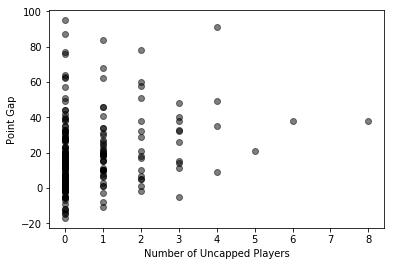

In [11]:
# Set variable values
x = df["Debutants"]
y = df["Point Gap"]

# Plot data
plt.figure()
plt.scatter(x, y, color='k', alpha=0.5)
# plt.title("Relation Between the Number of Debutant Players and Point Gap")
plt.xlabel("Number of Uncapped Players")
plt.ylabel("Point Gap")
plt.savefig("../Images/point-gap-new-caps.png")
plt.show()

## Export data set to html

In [12]:
with open('../table.html', 'w') as f:
    f.write(df.to_html(index=False))